# Lab assignment: classifying digits with Deep Networks

<img src="img/mnist.jpeg" style="width:480px;">

In this assignment we will face the problem of recognizing handwritten digits. We will see how in order to achieve maximum effectiveness we will need to resort to several Deep Learning techniques.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below, or in a different file as instructed.</td></tr>
 <tr><td><img src="img/exclamation.png" style="width:80px;height:80px;"></td><td>This is a hint or useful observation that can help you solve this assignment. You are not expected to write any solution, but you should pay attention to them to understand the assignment.</td></tr>
 <tr><td><img src="img/pro.png" style="width:80px;height:80px;"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **keras**
* **matplotlib**

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

# <span style="color:blue">Introducción</span>

<span style="color:blue">Para familiarizarme con el funcionamiento de las redes neuronales voy a empezar viendo tres ejemplos de redes sencillas con conexiones hacia adelante (*feedforward*), es decir, redes en las que ninguna salida de las neuronas es entrada de neuronas del mismo nivel o niveles precedentes, sino que todas las neuronas de una capa reciben señales de entrada de otra capa anterior, más cercana a las entradas de la red, y envían las señales de salida a una capa posterior, más cercana a la salida de la red. Se trata por tanto de grafos dirigidos. Las redes con conexiones hacia atrás (*feedback*) que tienen lazos cerrados son sistemas recurrentes y no se trabajará con ellas en esta práctica.  
Los tres ejemplos son las redes *feedforward* más conocidas: el perceptrón, la red ADALINE (ADAptative LINear Element) y *backpropagation*.</span>

## <span style="color:blue">Perceptrón</span>

<span style="color:blue">Un tipo de aprendizaje supervisado es el aprendizaje por corrección del error, que consiste en ajustar los pesos de las conexiones de la red en función de la diferencia entre los valores deseados (de los cuales se dispone) y los obtenidos en la salida de la red; es decir, en función del error cometido en la salida. Un ejemplo de algoritmo simple de aprendizaje por corrección del error lo constituye la regla de aprendizaje del perceptrón (Rosenblatt, 1958):  </span>

<span style="color:blue">\begin{equation}\Delta w_b(t+1) = \alpha x_b(t)[y(t)-f(t)]\end{equation}</span>

<span style="color:blue">Siendo  
$\Delta w_b$: la variación en el peso de la conexión entre la neurona $b$ de entrada y la neurona de salida,  
$x_b$: el valor ingresado en la neurona de entrada $b$,  
$y$: el valor de salida deseado (el valor de la label),  
$f$ : el valor de salida obtenido,  
$\alpha$ : el factor de aprendizaje ($0<\alpha\leq 1$) que regula la velocidad del aprendizaje,  
$t$ : el número de paso; es una especie de tiempo discreto que toma valores naturales.</span>

<span style="color:blue">El preceptrón es el caso más simple de red neuronal: solo una capa de entrada y una de salida. Está formado por varias neuronas para recibir las entradas a la red y una neurona de salida. Es capaz de decidir cuándo una entrada presentada a la red pertenece a una de las dos clases que es capaz de reconocer. La única neurona de salida del perceptrón realiza la suma ponderada (combinación lineal) de las entradas (más un término independiente o *bias*, $w_0$) y pasa el resultado a una función de transferencia de tipo escalón:  \begin{equation}f(z)=\left\{\begin{array}{ll}
 1 & \mbox{ si $z\geq 0$} \\
 0 & \mbox{ si $z< 0$} \end{array} \right. \end{equation} </span>
 
<span style="color:blue">Se trata, por tanto, de un dispositivo de entradas y salidas digitales. Al ser tan simple, el perceptrón tiene una capacidad de representación bastante limitada; solo es capaz de discriminar patrones muy sencillos, linealmente separables.  
Como ejemplo de funcionamiento de una red neuronal de tipo perceptrón voy a resolver el problema de la función OR. Para esta función la red debe ser capaz de devolver, a partir de los 4 patrones de entrada, {00, 01, 10, 11}, a qué clase pertenece cada uno. Esto es, para el patrón de entrada 00 debe devolver la clase 0 y para los restantes la clase 1. Las entradas (*features*) $x_1$ y $x_2$ serán dos valores binarios y la salida es:  
\begin{equation}a = f(w_0+w_1x_1+w_2x_2)=f\left(\sum_{b=0}^2 w_bx_b\right),\end{equation}  
donde se ha compactado la notación haciendo $x_0=1.$ El esquema del perceptrón es el siguiente:</span>

![perceptron](./Practica_AlgoritmosAvanzados_Pablo/perceptron.jpg)

<span style="color:blue">Sean inicialmente los valores elegidos aleatoriamente:  
    $w_0=1.5$  
    $w_1=0.5$  
    $w_2=1.5$  </span>
    
<span style="color:blue">La tabla descriptiva del proceso al inicio es:\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & & & & 1.5 & 0.5 & 1.5 & & & \end{array}  
Se van tomando uno a uno los cuatro patrones de entrada. Empiezo por el primero, $x_1(t=1)=0,$ $x_2(1)=0,$ $y(1)=0$ y $x_0=1.$ Actualizo la tabla: \begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & & & \end{array}  
La combinación lineal que llega a la neurona de salida es:  
\begin{equation}a(1) =\sum_{b=0}^2 w_b(1)x_b(1)= w_0(1)x_0+w_1(1)x_1(1)+w_2(1)x_2(1)=1'5\cdot 1+0'5\cdot 0+1'5\cdot 0= 1'5.\end{equation} Esta suma de productos no es más que un producto escalar, que, usando la notación vectorial/matricial, se puede escribir:  
\begin{equation}a(1)=\mathbf{w(1)\cdot x(1)} = (1.5, 0.5, 1.5)\left(\begin{array}{c}1\\ 0\\ 0 \end{array}\right)=1'5.\end{equation}  
La salida de la red, después de aplicar la función escalón, es:  
$f(t=1)=1,$  </span>

<span style="color:blue">puesto que el argumento (1'5) es mayor que cero. Entonces, el error cometido en este primer paso es:  
$\epsilon(1)=y(1)-f(1)= 0-1=-1.$  </span>

<span style="color:blue">Lo incorporo a la tabla, que después de completar el primer paso queda así:  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1 \end{array}  
En el ejemplo de la operación OR se considera como factor de aprendizaje $\alpha=1.$ Ahora se modifican los pesos según la expresión del algoritmo escrita más arriba, que con notación vectorial queda:  
\begin{equation}\mathbf{w(2)}=\mathbf{w(1)}+\alpha\epsilon(1)\mathbf{x(1)}=\left(\begin{array}{c}1.5\\ 0.5\\ 1.5 \end{array}\right)+1\cdot(-1)\cdot\left(\begin{array}{c}1\\ 0\\ 0 \end{array}\right)=\left(\begin{array}{c}0.5\\ 0.5\\ 1.5 \end{array}\right).\end{equation}  
Entonces:  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & & & & 0.5 & 0.5 & 1.5 & & &\end{array}  
Comienzo ahora el segundo paso. El segundo patrón de entrada es $x_1(2)=0,$ $x_2(2)=1,$ $y(2)=1$ y $x_0=1:$  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & & &\end{array}  
La combinación lineal que llega a la neurona de salida, la salida de la red después de aplicar la función escalón y el error cometido en este segundo paso son, respectivamente:  
$a(2)  = \mathbf{w(2)\cdot x(2)} = (0.5, 0.5, 1.5)\left(\begin{array}{c}1\\ 0\\ 1 \end{array}\right)=2,\\
f(2)  =  1,\\
\epsilon(2)  = y(2)-f(2)= 0.$  

<span style="color:blue">Por tanto,   
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\end{array}
</span>

<span style="color:blue">
Vuelvo a modificar los pesos. Como el error del segundo paso es cero, los pesos del tercer paso son iguales a los del segundo:  
$\mathbf{w(3)}=\mathbf{w(2)}+\alpha\epsilon(2)\mathbf{x(2)}=\left(\begin{array}{c}0.5\\ 0.5\\ 1.5 \end{array}\right)+1\cdot 0\cdot\left(\begin{array}{c}1\\ 0\\ 1 \end{array}\right)=\left(\begin{array}{c}0.5\\ 0.5\\ 1.5 \end{array}\right).$ Entonces:  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & & & & 0.5 & 0.5 & 1.5 & & &\end{array}
</span>

<span style="color:blue">
El tercer patrón es $x_1(3)=1,$ $x_2(3)=0,$ $y(3)=1$ y $x_0=1:$  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & & &\end{array}  
Vuelvo a calcular:  
$a(3)  = \mathbf{w(3)\cdot x(3)} = (0.5, 0.5, 1.5)\left(\begin{array}{c}1\\ 1\\ 0 \end{array}\right)=1,\\
f(3)  =  1,\\
\epsilon(3)  = y(3)-f(3)= 0.$
  </span>
  
<span style="color:blue">Por tanto,   
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\end{array}
</span>

<span style="color:blue">
Como el error del tercer paso también es cero, los pesos del cuarto paso son iguales a los del tercero:  
$\mathbf{w(4)}=\mathbf{w(3)}=\left(\begin{array}{c}0.5\\ 0.5\\ 1.5 \end{array}\right).$ Entonces:  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & & & & 0.5 & 0.5 & 1.5 & & &\end{array}  
Introduzco el cuarto patrón en la red: $x_1(4)=1,$ $x_2(4)=1,$ $y(4)=1$ y $x_0=1:$
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & & &\end{array}
Se procede igual:  
$a(4)  = \mathbf{w(4)\cdot x(4)} = (0.5, 0.5, 1.5)\left(\begin{array}{c}1\\ 1\\ 1 \end{array}\right)=2.5,\\
f(4)  =  1,\\
\epsilon(4)  = y(4)-f(4)= 0.$  
</span>

<span style="color:blue">
Entonces,  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\end{array}  
Ya se ha iterado el procedimiento con todos los patrones de entrada. Existe uno, 00, para el que el error cometido no es cero. Por consiguiente, se aplica de nuevo el algoritmo con todos los patrones de entrada.
</span>

<span style="color:blue">
Como el error del 4º paso también es cero, los pesos del 5º paso son iguales a los del 4º:  
$\mathbf{w(5)}=\mathbf{w(4)}=\left(\begin{array}{c}0.5\\ 0.5\\ 1.5 \end{array}\right).$   
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\\ 
\hline
5 & & & & 0.5 & 0.5 & 1.5 & & &\end{array}  
Introduzco otra vez el primer patrón en la red: $x_1(5)=0,$ $x_2(5)=0,$ $y(5)=0$ y $x_0=1:$
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\\
\hline
5 & 0 & 0 & 0 & 0.5 & 0.5 & 1.5 & & &\end{array} 
Se tiene:  
$a(5)  = \mathbf{w(5)\cdot x(5)} = (0.5, 0.5, 1.5)\left(\begin{array}{c}1\\ 0\\ 0 \end{array}\right)=0.5,\\
f(5)  =  1,\\
\epsilon(5)  = y(5)-f(5)= -1.$  
</span>

<span style="color:blue">
Entonces,  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\\
\hline
5 & 0 & 0 & 0 & 0.5 & 0.5 & 1.5 & 0.5 & 1 & -1\end{array}   
Actualizo los pesos:  
$\mathbf{w(6)}=\mathbf{w(5)}+\alpha\epsilon(5)\mathbf{x(5)}=\left(\begin{array}{c}0.5\\ 0.5\\ 1.5 \end{array}\right)+1\cdot(-1)\cdot\left(\begin{array}{c}1\\ 0\\ 0 \end{array}\right)=\left(\begin{array}{c}-0.5\\ 0.5\\ 1.5 \end{array}\right):$  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\\
\hline
5 & 0 & 0 & 0 & 0.5 & 0.5 & 1.5 & 0.5 & 1 & -1\\
6 & & & & -0.5 & 0.5 & 1.5 & & &\end{array}  
El siguiente patrón es: $x_1(6)=0,$ $x_2(6)=1,$ $y(6)=1$ y $x_0=1:$
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\\
\hline
5 & 0 & 0 & 0 & 0.5 & 0.5 & 1.5 & 0.5 & 1 & -1\\
6 & 0 & 1 & 1 & -0.5 & 0.5 & 1.5 & & &\end{array}  
Se puede comprobar que el error para este patrón y los dos siguientes es cero y, por tanto, los pesos no se ven modificados. Procediendo como hasta ahora, al final de la segunda vuelta la tabla queda:  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\\
\hline
5 & 0 & 0 & 0 & 0.5 & 0.5 & 1.5 & 0.5 & 1 & -1\\
6 & 0 & 1 & 1 & -0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
7 & 1 & 0 & 1 & -0.5 & 0.5 & 1.5 & 0 & 1 & 0\\
8 & 1 & 1 & 1 & -0.5 & 0.5 & 1.5 & 1.5 & 1 & 0
\end{array}.  
De nuevo, el error cometido para el patrón 00 no es cero. Por consiguiente, se hace una tercera vuelta con todos los patrones de entrada. Al final de ella, la tabla queda:  
\begin{array}{c|ccc|ccc|c|c|c}
t & x_1 & x_2 & y & w_0 & w_1 & w_2 & a & f & \epsilon\\
\hline
1 & 0 & 0 & 0 & 1.5 & 0.5 & 1.5 & 1.5 & 1 & -1\\
2 & 0 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2 & 1 & 0\\
3 & 1 & 0 & 1 & 0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
4 & 1 & 1 & 1 & 0.5 & 0.5 & 1.5 & 2.5 & 1 & 0\\
\hline
5 & 0 & 0 & 0 & 0.5 & 0.5 & 1.5 & 0.5 & 1 & -1\\
6 & 0 & 1 & 1 & -0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
7 & 1 & 0 & 1 & -0.5 & 0.5 & 1.5 & 0 & 1 & 0\\
8 & 1 & 1 & 1 & -0.5 & 0.5 & 1.5 & 1.5 & 1 &0\\
\hline
9 & 0 & 0 & 0 & -0.5 & 0.5 & 1.5 & -0.5 & 0 & 0\\
10 & 0 & 1 & 1 & -0.5 & 0.5 & 1.5 & 1 & 1 & 0\\
11 & 1 & 0 & 1 & -0.5 & 0.5 & 1.5 & 0 & 1 & 0\\
12 & 1 & 1 & 1 & -0.5 & 0.5 & 1.5 & 1.5 & 1 & 0
\end{array}.  
Como ya no se comete ningún error, la etapa de aprendizaje concluye. Los pesos finales son los que aparecen en la última fila.

</span>

<span style="color:blue">Una vez vista la teoría con ejemplo incluido, voy a montar un perceptrón con keras. Le paso los mismos pesos iniciales que en el ejemplo, genero una instancia del optimizador Stochastic Gradient Descent (SGD) con tasa de aprendizaje lr = 1 como en el ejemplo y emulo la función de activación escalón con una función sigmoide.  </span>

In [440]:
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD, RMSprop, Adam

In [598]:
uves = np.array([[0.5],
        [1.5]]).reshape(2,1)
bias=np.array([1.5]).reshape(1,)
pesos=[uves,bias]

perceptron=Sequential()
perceptron.add(Dense(1, input_shape=(2,), weights = pesos))
perceptron.add(Activation('sigmoid'))

perceptron.summary()

#rms=RMSprop(lr=1)
sgd=SGD(lr=1)
#adam=Adam(lr=1)
perceptron.compile(loss='binary_crossentropy',
               optimizer=sgd,
                  metrics=["accuracy"])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_153 (Dense)                (None, 1)             3           dense_input_138[0][0]            
____________________________________________________________________________________________________
activation_149 (Activation)      (None, 1)             0           dense_153[0][0]                  
Total params: 3
Trainable params: 3
Non-trainable params: 0
____________________________________________________________________________________________________


In [302]:
xx=np.array([[0,0],[0,1],[1,0],[1,1]]).reshape((4,2))
xx

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [360]:
yy=[0,1,1,1]

In [599]:
perceptron.fit(
    xx, # Training data
    yy, # Labels of training data
    #batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=30, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/30
4s - loss: 0.4767 - acc: 0.7500
Epoch 2/30
0s - loss: 0.4516 - acc: 0.7500
Epoch 3/30
0s - loss: 0.4295 - acc: 0.7500
Epoch 4/30
0s - loss: 0.4100 - acc: 0.7500
Epoch 5/30
0s - loss: 0.3929 - acc: 0.7500
Epoch 6/30
0s - loss: 0.3777 - acc: 0.7500
Epoch 7/30
0s - loss: 0.3640 - acc: 0.7500
Epoch 8/30
0s - loss: 0.3517 - acc: 0.7500
Epoch 9/30
0s - loss: 0.3405 - acc: 0.7500
Epoch 10/30
0s - loss: 0.3302 - acc: 0.7500
Epoch 11/30
0s - loss: 0.3206 - acc: 0.7500
Epoch 12/30
0s - loss: 0.3117 - acc: 0.7500
Epoch 13/30
0s - loss: 0.3033 - acc: 0.7500
Epoch 14/30
0s - loss: 0.2955 - acc: 0.7500
Epoch 15/30
0s - loss: 0.2880 - acc: 0.7500
Epoch 16/30
0s - loss: 0.2809 - acc: 0.7500
Epoch 17/30
0s - loss: 0.2742 - acc: 0.7500
Epoch 18/30
0s - loss: 0.2677 - acc: 0.7500
Epoch 19/30
0s - loss: 0.2616 - acc: 1.0000
Epoch 20/30
0s - loss: 0.2557 - acc: 1.0000
Epoch 21/30
0s - loss: 0.2501 - acc: 1.0000
Epoch 22/30
0s - loss: 0.2447 - acc: 1.0000
Epoch 23/30
0s - loss: 0.2395 - acc: 1.00

In [588]:
accuracy_per = perceptron.evaluate(xx, yy)
accuracy_per[0]
accuracy_per[1]

4/4 [==============================] - 3s


1.0

In [600]:
perceptron.layers[0].get_weights()

[array([[ 2.06366944],
        [ 2.4770968 ]], dtype=float32), array([-0.41536373], dtype=float32)]

<span style="color:blue">Después de varias rondas el modelo es capaz de predecir al 100% la función OR. Los pesos recuperados al final no son exactamente los mismos que los obtenidos en el ejemplo de arriba porque, entre otras cosas, la función de activación no es la misma.  
Existen otros algoritmos más evolucionados que el expuesto aquí. Este presenta algunas limitaciones como el no considerar la magnitud del error global cometido durante el proceso completo de aprendizaje de la red, sino considerando únicamente los errores individuales (locales) correspondientes al aprendizaje de cada patrón de muestra por separado. Un algoritmo muy conocido que mejora el del perceptrón es la regla delta o regla del mínimo error cuadrático medio (Widrow-Hoff, 1960), que se aplicó en las redes desarrolladas por los mismos autores, conocidas como ADALINE (ADAptative LINear Element), con una única neurona de salida y MADALINE (Multiple ADALINE), con varias neuronas de salida.</span>

## <span style="color:blue">ADALINE</span>

<span style="color:blue">Widrow y Hoff definieron una función que permitía cuantificar el error global cometido en cualquier momento durante el proceso de entrenamiento de la red, lo cual es importante, puesto que cuanta más información se tenga sobre el error cometido, más rápido se puede aprender. Este error medio se expresa de esta forma:  
\begin{equation}E=\frac{1}{N}\sum_{i=1}^N\frac{1}{2}\left[y_i-f(\mathbf{x_i;w})\right]^2=\frac{1}{N}\sum_{i=1}^N\frac{1}{2}\left(y_i-\sum_{a=0}^m w_a x_{ia}\right)^2.\end{equation}  
Donde $N$ es el número de informaciones que debe aprender la red, $m$ es el número de neuronas de entrada, $w_a$ son los pesos que hay que hallar ($w_0$ es el bias, al que corresponde $x_{i0}=1$), $x_{ia}$ es la componente a-ésima del patrón i-ésimo que entra a la neurona de entrada $a$ (los subíndices del principio del abecedario se refieren a las neuronas, mientras que los de enmedio del abecedario se refieren a los patrones de muestra), $y_i$ es la salida deseada del patrón i-ésimo (el valor i-ésimo de la variable objetivo), y $f(\mathbf{x_i;w})$ es la salida obtenida a partir del patrón de entrenamiento i-ésimo. Entonces, la cantidad $1/2 [y_i-f(\mathbf{x_i;w})]^2$ es el error cometido en el aprendizaje de la información (muestra) i-ésima. Se trata, por tanto, de encontrar unos pesos que minimicen esta función de error.  
La estructura de las redes ADALINE y MADALINE es casi idéntica a la del perceptrón elemental. La diferencia fundamental se refiere al mecanismo de aprendizaje. ADALINE emplea la regla Delta, buscando el mínimo de la anterior expresión del error entre la salida deseada y la salida lineal obtenida antes de aplicarle la función de activación, mientras que el perceptrón arroja una salida binaria. Debido a esta nueva forma de evaluar el error, estas redes pueden procesar información analógica, tanto de entrada como de salida. En cambio, el perceptrón es un dispositivo digital.  
Si la función de activación de la neurona de salida de ADALINE es la identidad, esta red da una salida lineal (combinación lineal de las entradas) y, por tanto, lo que hace la red al ajustar los pesos en el proceso de aprendizaje no es más que una **regresión lineal**. En este caso se puede resolver el problema de optimización del error de forma analítica como se muestra a continuación.  
Para minimizar la función de error hay que igualar a cero sus derivadas parciales respecto a los pesos que se quieren hallar, es decir, hay que hacer cero el gradiente de la función de error, $\mathbf{\nabla_{w} E}=0.$ Para el caso de solo dos features, es decir, solo dos neuronas de entrada:  
\begin{eqnarray}0&=&\frac{\partial E}{\partial w_0}=\frac{2}{2N}\sum_{i=1}^N (y_i-w_0-w_1x_{i1}-w_2x_{i2})\cdot (-1)\\
0&=&\frac{\partial E}{\partial w_1}=\frac{2}{2N}\sum_{i=1}^N (y_i-w_0-w_1x_{i1}-w_2x_{i2})\cdot (-x_{i1})\\
0&=&\frac{\partial E}{\partial w_2}=\frac{2}{2N}\sum_{i=1}^N (y_i-w_0-w_1x_{i1}-w_2x_{i2})\cdot (-x_{i2})
\end{eqnarray}  
Reordenando términos se tiene:  
\begin{eqnarray}
\sum_{i=1}^N w_0 + w_1\sum_{i=1}^N x_{i1}+ w_2\sum_{i=1}^N x_{i2}&=&\sum_{i=1}^N y_i\\
w_0 \sum_{i=1}^N x_{i1}+ w_1\sum_{i=1}^N x_{i1}^2+ w_2\sum_{i=1}^N x_{i1}x_{i2}&=&\sum_{i=1}^N x_{i1}y_i\\
w_0 \sum_{i=1}^N x_{i2}+ w_1\sum_{i=1}^N x_{i1}x_{i2}+ w_2\sum_{i=1}^N x_{i2}^2&=&\sum_{i=1}^N x_{i2}y_i
\end{eqnarray}  
Que, en notación matricial, puede escribirse como:  
\begin{equation}
\begin{pmatrix}
N & \sum x_{i1} & \sum x_{i2}\\
\sum x_{i1} & \sum x_{i1}^2 & \sum x_{i1}x_{i2}\\
\sum x_{i2} & \sum x_{i1}x_{i2} & \sum x_{i2}^2
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2
\end{pmatrix} = 
\begin{pmatrix}
\sum y_i \\
\sum x_{i1}y_i \\
\sum x_{i2}y_i
\end{pmatrix}
\end{equation}  
O de manera más compacta aún:  
\begin{pmatrix}
N & \sum x_{i1} & \sum x_{i2} & | & \sum y_i \\
\sum x_{i1} & \sum x_{i1}^2 & \sum x_{i1}x_{i2} & | & \sum x_{i1}y_i \\
\sum x_{i2} & \sum x_{i1}x_{i2} & \sum x_{i2}^2 & | & \sum x_{i2}y_i
\end{pmatrix}  
Donde se ha sustituido la matriz de incógnitas (pesos) y el símbolo de igualdad por una línea vertical discontinua. Esta matriz representa un sistema lineal de ecuaciones. Una forma de resolverlo es mediante el sistema de Gauss. Se sustituye la segunda fila (ecuación) por la resta de la segunda fila multiplicada por $N$ y la primera multiplicada por $\sum x_{i1},$ y la tercera fila por la resta de la tercera fila multiplicada por $N$ y la primera multiplicada por $\sum x_{i2}.$ Así se consigue ir haciendo cero todos los elementos debajo de la diagonal principal y, por tanto, triangular la matriz. Después solo queda despejar las incógnitas hacia atrás, empezando por $w_2.$ Quedan las siguientes expresiones:  

</span>

<span style="color:blue">
\begin{eqnarray}
w_2 & = & \frac{\left[ N \sum x_{i1}^2 - \left(\sum x_{i1}\right)^2\right]\left(N \sum x_{i2}y_i - \sum x_{i2}\sum y_j\right) - \left(N \sum x_{i1}x_{i2} - \sum x_{i1}\sum x_{j2}\right)\left(N \sum x_{i1}y_i - \sum x_{i1}\sum y_j\right)}{\left[ N \sum x_{i1}^2 - \left(\sum x_{i1}\right)^2\right]\left[ N \sum x_{i2}^2 - \left(\sum x_{i2}\right)^2\right] - 
\left(N \sum x_{i1}x_{i2} - \sum x_{i1}\sum x_{j2}\right)^2} \\
\\
w_1 & = & \frac{N \sum x_{i1}y_i - \sum x_{i1}\sum y_j - \left(N \sum x_{i1}x_{i2} - \sum x_{i1}\sum x_{j2}\right)w_2}{ N \sum x_{i1}^2 - \left(\sum x_{i1}\right)^2} \\
\\
w_0 & = & \frac{1}{N}\left(\sum y_i - w_2\sum x_{i2} - w_1\sum x_{i1}\right) = \bar{y} - w_1 \bar{x}_1  - w_2 \bar{x}_2
\end{eqnarray}  
</span>

<span style="color:blue">Otra manera de resolver el problema pasa por emplear la notación matricial desde el principio. La función de error global puede escribirse:  
</span>

<span style="color:blue">
\begin{equation}E=\frac{1}{2N}\sum_{i=1}^N\left(y_i-\sum_{a=0}^m w_a x_{ia}\right)^2=\frac{1}{2N}\sum_{i=1}^N\left(y_i-\sum_{a=0}^m w_a x_{ia}\right)\left(y_i-\sum_{a=0}^m w_a x_{ia}\right)=\frac{1}{2N}\left(Y-X\cdot W\right)^T\left(Y-X\cdot W\right).\end{equation}  
Donde $Y$ es la matriz columna (dimensión N x 1) que contiene los $N$ valores de la *target* $y,$ $W$ es la matriz columna de dimensiones (m+1) x 1 que contiene los pesos y $X$ es la matriz de dimensiones N x (m+1) que contiene una columna de N unos y m columnas con los N valores de sendas *features*. En este caso, la matriz $X$ tiene 3 columnas y $W$ es de 3 x 1. Usando la regla de derivación de un producto la condición de minimización queda:  
\begin{equation}0=\frac{\partial E}{\partial W}=\frac{1}{2N}\left[\left(\frac{\partial}{\partial W}Y-\frac{\partial}{\partial W}X\cdot W\right)^T\left(Y-X\cdot W\right)+\left(Y-X\cdot W\right)^T\left(\frac{\partial}{\partial W}Y-\frac{\partial}{\partial W}X\cdot W\right)\right]=-\frac{1}{2N}\left[X^T\left(Y-X\cdot W\right)+\left(Y-X\cdot W\right)^T X\right]=-\frac{1}{N}X^T\left(Y-X\cdot W\right)=\frac{1}{N}(-X^T Y+X^T XW).\end{equation}  
En el penúltimo paso se ha utilizado la propiedad de la transposición de un producto de matrices, $(AB)^T=B^T A^T.$ Despejando la matriz de pesos se obtiene:  
\begin{equation}W=(X^TX)^{-1}X^TY\end{equation}  
Voy a generar un conjunto de datos de ejemplo para aplicar las expresiones anteriores. Para ello voy a usar la función $f(x_1,x_2)=2x_1+3x_2-4.$  
**Advertencia.** Para generar conjuntos de datos sintéticos es habitual usar valores enteros para las *features* que están en progresión aritmética. Puede demostrarse que si se hace esto, el denominador de la expresión de $w_2$ se anula, independientemente de cuáles sean las diferencias de ambas progresiones aritméticas.</span>

In [441]:
x1_sintetico = np.arange(1,51).reshape(50,1)
x2_sintetico_a = np.arange(-4,46,2).reshape(25,1)
x2_sintetico_b = np.arange(200,225).reshape(25,1)
x2_sintetico = np.concatenate((x2_sintetico_a, x2_sintetico_b),axis=0)
X_sintetico = np.concatenate((np.ones((50,1)),x1_sintetico,x2_sintetico),axis=1)
y_sintetico = 2*x1_sintetico + 3*x2_sintetico - 4
print(type(x1_sintetico))
print(type(x2_sintetico))
print(type(X_sintetico))
print(type(y_sintetico))
print(x1_sintetico.shape)
print(x2_sintetico.shape)
print(X_sintetico.shape)
print(y_sintetico.shape)
print(x1_sintetico)
print(x2_sintetico)
print(X_sintetico)
print(y_sintetico)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(50, 1)
(50, 1)
(50, 3)
(50, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]]
[[ -4]
 [ -2]
 [  0]
 [  2]
 [  4]
 [  6]
 [  8]
 [ 10]
 [ 12]
 [ 14]
 [ 16]
 [ 18]
 [ 20]
 [ 22]
 [ 24]
 [ 26]
 [ 28]
 [ 30]
 [ 32]
 [ 34]
 [ 36]
 [ 38]
 [ 40]
 [ 42]
 [ 44]
 [200]
 [201]
 [202]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]
 [209]
 [210]
 [211]
 [212]
 [213]
 [214]
 [215]
 [216]
 [217]
 [218]
 [219]
 [220]
 [221]
 [222]
 [223]
 [224]]
[[   1.    1.   -4.]
 [   1.    2.   -2.]
 [   1.    3.    0.]
 [   1.    4.    2.]
 [   1.    5.    4.]
 [   1.    6.    6.]
 [   1.    7.    8.]
 [   1.    8.   10.]
 [   1.    9.   12.]
 [   1.   10.   14.]
 [   1.   

<span style="color:blue">Como los datos son exactos, la matriz de pesos $W$ estará formada por los coeficientes de la función empleada: -4, 2 y 3.</span>

In [442]:
W = np.linalg.inv(X_sintetico.T.dot(X_sintetico)).dot(X_sintetico.T).dot(y_sintetico)
print(type(W))
print(W.shape)
print(W)

<class 'numpy.ndarray'>
(3, 1)
[[-4.]
 [ 2.]
 [ 3.]]


<span style="color:blue">Voy a introducir una fluctuación en los valores de la target para tener un conjunto de datos más realista. Los coeficientes de la regresión lineal, es decir, los pesos se parecerán, pero ya no son exactos.</span>

In [164]:
fluctuacion = np.random.normal(0,1,(50,1))/2
print(type(fluctuacion))
print(fluctuacion.shape)
print(fluctuacion)

<class 'numpy.ndarray'>
(50, 1)
[[-0.48425667]
 [-1.1221604 ]
 [-0.03441665]
 [ 0.12485512]
 [ 0.58648096]
 [ 0.53678654]
 [ 0.22796723]
 [ 0.53091137]
 [ 0.0145445 ]
 [ 0.76623491]
 [ 0.22393754]
 [-0.58784741]
 [ 0.60957521]
 [ 0.40420264]
 [ 0.41687124]
 [-0.9564608 ]
 [ 0.24252509]
 [-0.36286829]
 [ 0.15175597]
 [-0.37464867]
 [ 0.55262101]
 [ 0.05428347]
 [ 0.16914359]
 [ 0.5321433 ]
 [-0.29146251]
 [-0.92368245]
 [ 0.22980425]
 [-0.10894713]
 [ 0.51726502]
 [ 0.37237703]
 [-0.18262395]
 [ 0.20253773]
 [-0.40020821]
 [-0.00955158]
 [ 0.05702825]
 [ 0.01679214]
 [ 0.4844253 ]
 [-0.02402542]
 [ 0.4990105 ]
 [ 0.26753858]
 [ 0.22219097]
 [-0.23936978]
 [-0.66898494]
 [-0.2534228 ]
 [ 0.14743442]
 [ 0.47494455]
 [-0.08196093]
 [ 0.12688225]
 [-0.43563063]
 [ 0.26952599]]


In [443]:
y_sintetico = 2*x1_sintetico + 3*x2_sintetico - 4 + fluctuacion
y_sintetico

array([[ -14.48425667],
       [  -7.1221604 ],
       [   1.96558335],
       [  10.12485512],
       [  18.58648096],
       [  26.53678654],
       [  34.22796723],
       [  42.53091137],
       [  50.0145445 ],
       [  58.76623491],
       [  66.22393754],
       [  73.41215259],
       [  82.60957521],
       [  90.40420264],
       [  98.41687124],
       [ 105.0435392 ],
       [ 114.24252509],
       [ 121.63713171],
       [ 130.15175597],
       [ 137.62535133],
       [ 146.55262101],
       [ 154.05428347],
       [ 162.16914359],
       [ 170.5321433 ],
       [ 177.70853749],
       [ 647.07631755],
       [ 653.22980425],
       [ 657.89105287],
       [ 663.51726502],
       [ 668.37237703],
       [ 672.81737605],
       [ 678.20253773],
       [ 682.59979179],
       [ 687.99044842],
       [ 693.05702825],
       [ 698.01679214],
       [ 703.4844253 ],
       [ 707.97597458],
       [ 713.4990105 ],
       [ 718.26753858],
       [ 723.22219097],
       [ 727.760

In [444]:
W = np.linalg.inv(X_sintetico.T.dot(X_sintetico)).dot(X_sintetico.T).dot(y_sintetico)
print(type(W))
print(W.shape)
print(W)

<class 'numpy.ndarray'>
(3, 1)
[[-3.97355693]
 [ 2.00535035]
 [ 2.99902521]]


<span style="color:blue">Voy a exportar el conjunto de datos para usarlos en Excel con las expresiones de los pesos deducidas previamente. Compruebo que los valores de los pesos coinciden a la perfección con ambas maneras que he seguido para deducir $W$ (véase el anexo). </span>

In [170]:
import pandas as pd

In [171]:
salida = pd.DataFrame(np.concatenate((x1_sintetico,x2_sintetico,y_sintetico),axis=1))

In [176]:
salida.to_csv('RegresionLinealPrueba2Features.csv', index=False, header=False) # header = False para que no escriba los nombres
                                                                               # de las columnas en la primera fila.

<span style="color:blue">El ejemplo lineal visto aquí es muy sencillo, pero si la función de activación de la neurona de salida fuera más complicada, como por ejemplo una sigmoide, ya no se podrían aplicar las soluciones analíticas mostradas antes, sino que se utiliza la regla delta. Ya se ha visto que la función de error global es  
\begin{equation}E=\frac{1}{N}\sum_{i=1}^N\frac{1}{2}\left[y_i-f(\mathbf{x_i;w})\right]^2=\frac{1}{N}\sum_{i=1}^N\frac{1}{2}\left(y_i-\sum_{a=0}^m w_a x_{ia}\right)^2=\frac{1}{N}\sum_{i=1}^N \frac{1}{2}\epsilon_i^2.\end{equation}  
Donde $\epsilon_i$ es el error individual de un solo patrón de muestra. Lo que hace la regla delta es asignar a cada neurona una modificación de su peso que es proporcional a la variación del error individual respecto al cambio del peso de dicha neurona. Esto puede interpretarse como que este algoritmo modifica el peso de una neurona proporcionalmente a la contribución de dicha neurona al error total. Es decir, las modificaciones en los pesos son proporcionales al gradiente decreciente del error:  
\begin{equation}\Delta w_b = -\alpha\frac{1}{2}\frac{\partial\epsilon_i^2}{\partial w_b}=-\alpha\frac{1}{2}\cdot 2\left(y_i-\sum_{a=0}^m w_a x_{ia}\right)\cdot (-x_{ib})=\alpha(y_i-f(\mathbf{x_i;w}))x_{ib}=\alpha\epsilon_ix_{ib}.\end{equation}  
En notación vectorial:  
\begin{equation}\mathbf{w}(t+1)=\mathbf{w}(t)+\alpha(t)\epsilon(t)\mathbf{x}(t).\end{equation}  
Donde $\alpha$ es la constante de proporcionalidad o tasa de aprendizaje. Esta expresión es parecida a la obtenida anteriormente para el caso del perceptrón. La diferencia está en el valor del error $\epsilon_i,$ que en el caso del perceptrón se refería a la diferencia entre el valor deseado y la salida binaria $y_i,$ no a la salida lineal de la red ADALINE.  
Aunque a simple vista no parece que exista gran diferencia entre ambos tipos de mecanismos de aprendizaje, el caso de la red ADALINE mejora al del perceptrón porque va a ser más sencillo alcanzar el mínimo de error, facilitando la convergencia del proceso de entrenamiento. Esto se demuestra mediante la forma de la función de error, que en el caso de ADALINE tiene forma de paraboloide con un mínimo global claro, mientras que en el caso de usar la salida binaria tiene gran cantidad de mínimos locales. Existe una situación intermedia que consiste en usar una activación sigmoidal. En este caso la superficie de error tendría un gran mínimo global  (como en ADALINE) y varios mínimos locales (como en el perceptrón, pero en menor medida).  
La aplicación del algoritmo iterativo de aprendizaje consta de los siguientes pasos:  
1. Se inicializan los pesos de la red.
2. Se aplica un patrón de entrada, $\mathbf{x}(t),$ en las neuronas de entrada de la red ADALINE.  
3. Se obtiene la salida lineal $\mathbf{x}(t)\cdot \mathbf{w}(t)$ y se calcula la diferencia con respecto a la deseada, $\epsilon(t).$  
4. Se actualizan los pesos, $\mathbf{w}(t+1)=\mathbf{w}(t)+\alpha(t)\epsilon(t)\mathbf{x}(t).$  
5. Se repiten los pasos anteriores desde el paso 2 con todos los patrones de entrada (N).  
6. Si el error cuadrático medio, $\frac{1}{2N}\sum_{i=1}^N \epsilon_i^2,$ es un valor reducido aceptable, termina el proceso de aprendizaje. Si no, se repite otra vez desde el primer paso con todos los patrones.</span>

<span style="color:blue">Paso ahora a montar una red ADALINE con activación identidad usando keras y le aplico el conjunto de datos anterior para comprobar que los pesos que obtiene mediante una variante de algoritmo de gradiente decreciente coinciden con los de la regresión lineal que acabo de hacer de dos maneras analíticas exactas.</span>

In [445]:
x_sintetico = np.concatenate((x1_sintetico,x2_sintetico),axis=1)
x_sintetico[:4,:]

array([[ 1, -4],
       [ 2, -2],
       [ 3,  0],
       [ 4,  2]])

In [494]:
#from keras import backend as K

def identidad(x):
    return x

In [571]:
adaline=Sequential()
adaline.add(Dense(1, input_shape=(2,),activation=identidad))
adaline.add(Activation(identidad))

adaline.summary()

adam = Adam(lr=1.5,decay=0.0005685)
adaline.compile(loss='mean_squared_error',
               optimizer=adam)
               # metrics=['accuracy'])


    
adaline.fit(x_sintetico, y_sintetico, batch_size=5, # Batch size for the optimizer algorithm
    nb_epoch=80, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
    #WeightLogger()
    #callbacks=[history]
    )


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_144 (Dense)                (None, 1)             3           dense_input_129[0][0]            
____________________________________________________________________________________________________
activation_143 (Activation)      (None, 1)             0           dense_144[0][0]                  
Total params: 3
Trainable params: 3
Non-trainable params: 0
____________________________________________________________________________________________________
Epoch 1/80
3s - loss: 26426.2108
Epoch 2/80
0s - loss: 11088.9977
Epoch 3/80
0s - loss: 2708.9644
Epoch 4/80
0s - loss: 742.7583
Epoch 5/80
0s - loss: 195.0173
Epoch 6/80
0s - loss: 154.2536
Epoch 7/80
0s - loss: 228.9606
Epoch 8/80
0s - loss: 301.6581
Epoch 9/80
0s - loss: 296.6746
Epoch 10/80
0s - loss: 259.4959
Epoch 11/80
0s - l

In [572]:
adaline.layers[0].get_weights()

[array([[ 2.00519991],
        [ 2.99923468]], dtype=float32), array([-3.97315216], dtype=float32)]

<span style="color:blue">Efectivamente, los pesos a los que llega la red después del proceso de aprendizaje son justamente los coeficientes de la regresión lineal obtenidos previamente ($w_0=-3.973, w_1=2.005$ y $w_2=2.999$). Por tanto, queda comprobado el funcionamiento de una red ADALINE como regresor lineal.</span>

## <span style="color:blue">Red backpropagation</span>

<span style="color:blue">Ahora paso a considerar redes con capas ocultas, es decir, con más niveles de neuronas que los empleados por el perceptrón y ADALINE. El método de aprendizaje que se va a utilizar se conoce generalmente como *backpropagation* y está basado en la regla delta. Este método consta de dos fases. Primero se aplica un patrón de entrada, que se va propagando a través de todas las capas superiores hasta generar una salida, que se compara con la salida deseada, y se calcula un error para cada neurona de salida. A continuación, estos errores se transmiten hacia atrás, partiendo de la capa de salida hacia todas las neuronas de la capa intermedia que contribuyen directamente a la salida, recibiendo el porcentaje de error aproximado a la participación de la neurona intermedia en la salida original. Este proceso se repite capa por capa hasta que todas las neuronas de la red hayan recibido un error que describa su aportación relativa al error total. Basándose en el valor del error recibido, se reajustan los pesos de cada neurona, de forma que la siguiente vez que se presente el mismo patrón, la salida esté más cercana a la deseada, es decir, el error disminuya.  
Este método sigue la regla delta generalizada. Los pesos se ajustan como en la regla delta usada en el perceptrón y ADALINE: los pesos se actualizan de forma proporcional a la delta o diferencia entre la salida deseada y la obtenida. El punto en el que difieren la regla delta generalizada de la regla delta es en el valor concreto de esa delta. Además, en las redes multinivel, al contrario que en las redes sin neuronas ocultas, no se puede conocer en principio la salida deseada de las neuronas de las capas ocultas para poder determinar los pesos en función del error cometido. En cambio, sí se puede conocer la salida deseada de las neuronas de salida. Voy a suponer una red con una capa oculta.
El algoritmo consta de los siguientes pasos:
1. Se inicializan los pesos de la red.
2. Se aplica un patrón de entrada, $\mathbf{x}(t),$ en las neuronas de entrada de la red.  
3. Se calculan las entradas a las neuronas ocultas procedentes de las neuronas de entrada, $A_b(t) = \sum_{a=0}^{m_1} U_{ba}x_a(t),$ donde $U_{ba}$ es el peso de interconexión entre la neurona oculta b-ésima y la neurona de entrada a-ésima, $m_1$ es el número de unidades de la capa de entrada y $x_a(t)$ es la feature a-ésima, es decir, la componente a-esima del patrón de entrada.  
4. Se calculan las salidas de las neuronas ocultas, $O_b(t)=\sigma(A_b(t)).$  
5. Se calculan las entradas a las neuronas de salida procedentes de las neuronas ocultas, $z_c(t) = \sum_{b=0}^{m_2} V_{cb}O_b(t),$ donde $V_{cb}$ es el peso de interconexión entre la neurona de salida c-ésima y la neurona oculta b-ésima, $m_2$ es el número de unidades de la capa oculta. Los subíndices $a, b, c$ hacen referencia a las neuronas de las capas de entrada, oculta y de salida, respectivamente.  
6. Se calculan las salidas de las neuronas de salida, $\phi(z_c(t)).$
7. Se actualizan los pesos: 
\begin{eqnarray} V_{cb}(t+1)&=& V_{cb}(t)+\alpha(t)\epsilon_c(t)O_b(t), \;\;\; \mbox{ donde  }\; \epsilon_c(t)=[y_c(t)-\phi(z_c(t))]\phi'(z_c(t)) \\
U_{ba}(t+1)&=& U_{ba}(t)+\alpha(t)\delta_b(t)x_a(t), \;\;\; \mbox{ donde  }\; \delta_b(t)=\sigma'(A_b(t))\sum_{c=0}^{m_3}V_{cb}(t)\epsilon_c(t).  \end{eqnarray}  
Siendo $y_c(t)$ la salida deseada de la neurona de salida c-ésima para el patrón presentado en el instante $t.$  
En el caso de que la función de activación de la capa de salida fuera la identidad, $\phi(z)=z,$ se tendría $\phi'(z)=1$ y los términos de error para las neuronas de salida quedan $\epsilon_c(t)=y_c(t)-\phi(z_c(t)).$ Si la función de activación de la capa de salida fuera sigmoidal, $\phi(z)=1/(1+e^{-z}),$ se tendría $\phi'(z)=\phi(z)(1-\phi(z)).$  
Nótese que el error de las capas ocultas, $\delta_b,$ depende de todos los términos de error de la capa de salida, $\epsilon_c.$ De aquí surge la nomenclatura de *backpropagation*. Los errores de una capa dependen de los errores de la capa inmediatamente posterior.
8. Se repiten los pasos anteriores desde el paso 2 hasta que el error resulta aceptablemente pequeño.   
</span>

<span style="color:blue">Una vez vista esta introducción paso a la práctica propiamente dicha.</span>

## The Keras library

In this lab we will make use of the <a href=http://keras.io/>keras</a> Deep Learning library for Python. This library allows building several kinds of shallow and deep networks, following either a sequential or a graph architecture.

## Data loading

The handwritten digits recognition problem we will face is already included as a testbed in keras. Loading it only requires invoking

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


15302656/15296311 [==============================] - 8s     


The loaded **X** variables are made up of the handwritten digits to classify, while the **y** variables contain the labels of the corresponding X images, telling the digits such images represent. We will use the **train** data to build our neural network, while we will use the **test** data to measure the performance of such network on an independent dataset.

We can check how many images we have for training and testing as follows:

In [3]:
len(X_train)

60000

In [4]:
len(y_test)

10000

In [8]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))

(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Also we can take a look at the shape, width and height in pixels, of an image:

In [5]:
X_test[0].shape

(28, 28)

In [60]:
X_train[0][5]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01176471,  0.07058824,  0.07058824,
        0.07058824,  0.49411765,  0.53333336,  0.68627453,  0.10196079,
        0.65098041,  1.        ,  0.96862745,  0.49803922,  0.        ,
        0.        ,  0.        ,  0.        ], dtype=float32)

We can also visualize the images we are working with by means of using the matplotlib library. Here we are taking the first training image and painting it with a grayscale colormap. Also we are printing the corresponding class value, to ensure the labeling of the digit is correct.

Digit class: 5


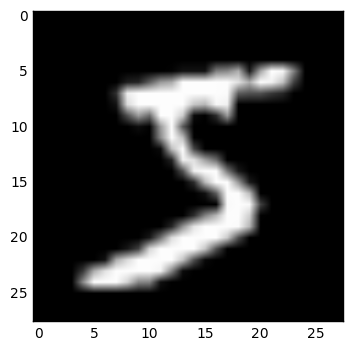

In [9]:
plt.imshow(X_train[0], 'gray')
print("Digit class:", y_train[0])

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Use the cell below to plot some other image in the training dataset, along with its corresponding digit class number. Can you find any hard to identify digit?
 </td></tr>
</table>

Digit class: 8


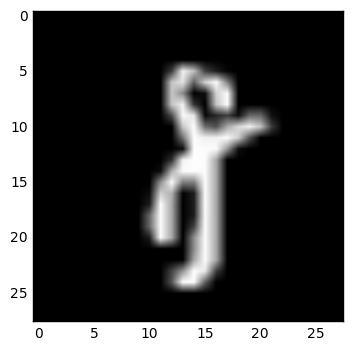

In [58]:
####### INSERT YOUR CODE HERE
plt.imshow(X_train[240], 'gray')
print("Digit class:", y_train[240])

Digit class: 7


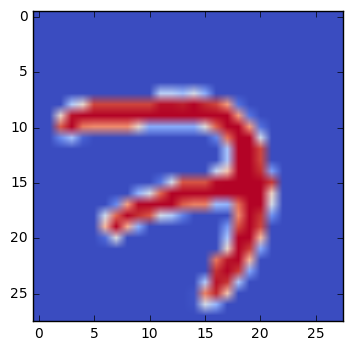

In [61]:
plt.imshow(X_train[5000], 'coolwarm')
print("Digit class:", y_train[5000])

Before starting building networks we should always normalize our data. This usually means substracting the mean from each variable and then dividing by the standard deviation. However in grayscale images like the ones we are working with all variables represent pixel intensities, and are bound to integers in the range [0, 255]. We can thus perform a simple initialization by just compressing this range to [0, 1]. We should also transform the data to real numbers (float) while performing this operation:

In [10]:
X_train = X_train.astype('float32') / 255

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Perform the same normalization for the test data
 </td></tr>
</table>

In [11]:
####### INSERT YOUR CODE HERE
X_test = X_test.astype('float32') / 255

As for the outputs, normalization as such is not required, but we should change the class encoding to something more akin to neural networks. Instead of having a single integer ranging [0,9] to encode the different classes, we will use a <a href=https://en.wikipedia.org/wiki/One-hot>one-hot vector encoding</a>

In [14]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10) # We have 10 classes to codify

Let's check that the transformation was correct:

In [15]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Repeat the same encoding for the classes of the test data
 </td></tr>
</table>

In [16]:
####### INSERT YOUR CODE HERE
Y_test = np_utils.to_categorical(y_test, 10)
Y_test

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Perceptron network

Let's start trying to solve the problem with the simplest neural network: a Perceptron. This means a neural network with no hidden layers, just some weights going from input to output.

### Defining the network

Building a network in Keras begins by choosing the type of architecture. We can either decide to build a **Sequential** network, where each layer is followed by another one in a chain, or a **Graph** network, where divergences and loops of layers can take place. In this practice we will restrict ourselves to the Sequential architecture. We can initialize a Sequential network with

In [17]:
from keras.models import Sequential
model = Sequential()

Once the network has been initialized this way, we just need to iteratively add the desired layers. For the perceptron network we only require a "classic" layer of weights from input to output. Such layer is name **Dense** in Keras.

In [18]:
from keras.layers.core import Dense

Usually creating a dense layer only involves specifying the number of outputs units of such layer. But since this will be the first layer in the network we also need to specify the number of inputs. Our inputs are images of 28x28 pixels, which makes 784 input values. As for the outputs, we have 10 classes in our problem, so that makes 10 output units.

In [19]:
denselayer = Dense(10, input_shape=(784,))

Now we add the layer to network

In [20]:
model.add(denselayer)

With this we have declared the layer of weights from inputs to outputs. Since we are facing a classification problem we should also add an activation function to the output units that enforces the output values to the range [0,1]. We will choose a softmax activation for doing so:

In [21]:
from keras.layers.core import Activation
model.add(Activation('softmax'))

With this the definition of our network is completed. We can get a text description of the network by calling

In [22]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 10)            7850        dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 10)            0           dense_1[0][0]                    
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
____________________________________________________________________________________________________


### Compiling the network

After defining the network architecture the next step involves compiling the network. Compilation is an automatic process that transforms the network definition into an equivalent symbolic formulation for which derivatives can be computed, thus allowing learning through backpropagation. The only input required in this process is choosing the loss function the network should minimize, and the optimizer used for learning.

For our current network we will use **categorical crossentropy** as the loss function, as it is suitable for multiclass classification problems. As for the optimizer, we will use **Stochastic Gradient Descent**. We will also include the **classification accuracy** as a metric to measure the performance of our model.

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training the network

We are now almost ready to adjust the network parameters through training over our data. There is only one small detail left: our data is in the form of bidimensional images, while a perceptron only understands training patterns as one-dimensional vectors of data. We should then transform the data to vector form to input it into the network, something we can do with the **reshape** method of the data:

In [24]:
trainvectors = X_train.reshape(60000, 784)

We can check now that our training data has become a matrix of 60000 training patterns (rows) and 784 variables (pixels) per pattern:

In [25]:
trainvectors.shape

(60000, 784)

<span style="color:blue">Compruebo que, por ejemplo, las componentes de la quinta fila de la primera imagen (posición 0), X_train[0][5], son las mismas. Cada fila contiene 28 elementos (28 columnas), así que tengo que comprobar desde la posición 5x28=140 hasta la 140+28=168, trainvectors[0][140:168]</span>

In [65]:
trainvectors[0][140:168]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01176471,  0.07058824,  0.07058824,
        0.07058824,  0.49411765,  0.53333336,  0.68627453,  0.10196079,
        0.65098041,  1.        ,  0.96862745,  0.49803922,  0.        ,
        0.        ,  0.        ,  0.        ], dtype=float32)

In [64]:
X_train[0][5]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01176471,  0.07058824,  0.07058824,
        0.07058824,  0.49411765,  0.53333336,  0.68627453,  0.10196079,
        0.65098041,  1.        ,  0.96862745,  0.49803922,  0.        ,
        0.        ,  0.        ,  0.        ], dtype=float32)

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Perform a similar transformation for the X_test data, saving the reshaped data into a variable named *testvectors*. Note that the number of pattens in the test data is different from the number of patterns in the training data.
 </td></tr>
</table>

In [26]:
####### INSERT YOUR CODE HERE
testvectors = X_test.reshape(10000,784)
testvectors.shape

(10000, 784)

Now we can invoke the **fit** method of the network, which will perform the training process. It is done as follows

In [27]:
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
5s - loss: 1.2713 - acc: 0.7070
Epoch 2/20
4s - loss: 0.7116 - acc: 0.8410
Epoch 3/20
4s - loss: 0.5840 - acc: 0.8596
Epoch 4/20
4s - loss: 0.5226 - acc: 0.8692
Epoch 5/20
4s - loss: 0.4852 - acc: 0.8759
Epoch 6/20
4s - loss: 0.4595 - acc: 0.8798
Epoch 7/20
4s - loss: 0.4405 - acc: 0.8840
Epoch 8/20
4s - loss: 0.4257 - acc: 0.8867
Epoch 9/20
4s - loss: 0.4137 - acc: 0.8894
Epoch 10/20
4s - loss: 0.4039 - acc: 0.8914
Epoch 11/20
4s - loss: 0.3955 - acc: 0.8933
Epoch 12/20
4s - loss: 0.3883 - acc: 0.8948
Epoch 13/20
4s - loss: 0.3820 - acc: 0.8957
Epoch 14/20
4s - loss: 0.3764 - acc: 0.8969
Epoch 15/20
4s - loss: 0.3714 - acc: 0.8980
Epoch 16/20
4s - loss: 0.3669 - acc: 0.8992
Epoch 17/20
4s - loss: 0.3629 - acc: 0.9003
Epoch 18/20
4s - loss: 0.3592 - acc: 0.9011
Epoch 19/20
4s - loss: 0.3559 - acc: 0.9017
Epoch 20/20
4s - loss: 0.3527 - acc: 0.9027


Now that our neural network model is trained, we can obtain class predictions for the test set as follows:

In [28]:
preds = model.predict_classes(testvectors)

10000/10000 [==============================] - 2s     


So for instance, the first image in the test set and its predicted class are

Real class 7 predicted class 7


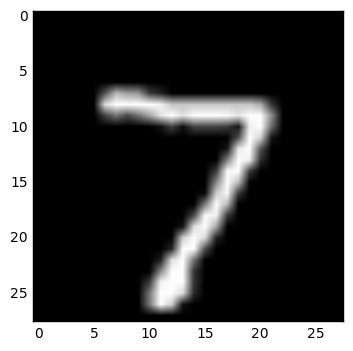

In [29]:
plt.imshow(X_test[0], 'gray')
print("Real class", y_test[0], "predicted class", preds[0])

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compare the predicted and real classes for other images in the test set. Can you find any error?
 </td></tr>
</table>

<table>
 <tr><td><img src="img/exclamation.png" style="width:80px;height:80px;"></td><td>
You can spot all the errors in an automated way by comparing *y_test* against *preds* and getting the indexes of the mismatching elements. The function <a href=http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html>np.where</a> might also help.
 </td></tr>
</table>

In [68]:
####### INSERT YOUR CODE HERE
import numpy as np
erroneos = np.where(y_test!=preds)
print(type(erroneos))
print(len(erroneos))
print(len(erroneos[0]))
print(erroneos)

<class 'tuple'>
1
898
(array([   8,   33,   46,   63,   77,   92,  111,  124,  149,  193,  195,
        217,  233,  241,  243,  245,  247,  259,  290,  300,  307,  313,
        318,  320,  321,  325,  340,  341,  352,  362,  403,  435,  444,
        445,  448,  449,  464,  468,  478,  479,  483,  495,  502,  507,
        511,  515,  530,  531,  536,  543,  551,  553,  565,  569,  578,
        582,  591,  605,  610,  613,  619,  624,  627,  628,  629,  638,
        658,  659,  684,  691,  707,  717,  720,  728,  738,  740,  741,
        760,  781,  791,  795,  800,  839,  844,  857,  881,  882,  898,
        900,  924,  938,  939,  944,  947,  950,  956,  959,  965,  975,
        982, 1012, 1014, 1032, 1033, 1039, 1044, 1050, 1062, 1068, 1082,
       1096, 1101, 1107, 1112, 1114, 1119, 1147, 1173, 1181, 1192, 1194,
       1198, 1200, 1202, 1204, 1206, 1208, 1217, 1224, 1226, 1228, 1232,
       1233, 1234, 1242, 1247, 1248, 1251, 1256, 1260, 1283, 1289, 1291,
       1299, 1319, 1326, 132

Real class 5 predicted class 5 True
Real class 9 predicted class 8 False
Real class 8 predicted class 8 True
Real class 7 predicted class 4 False
Real class 2 predicted class 2 True
Real class 3 predicted class 6 False
Real class 0 predicted class 0 True
Real class 4 predicted class 2 False
Real class 4 predicted class 4 True
Real class 2 predicted class 2 True

Real class 9 predicted class 8


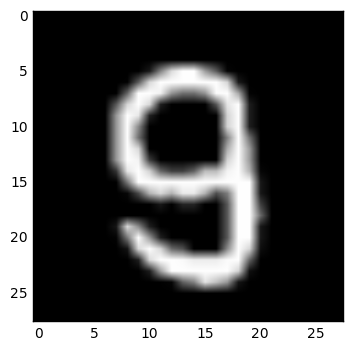

In [71]:
[print("Real class", y_test[n], "predicted class", preds[n], y_test[n]==preds[n] ) for n in range (240,250)]
print("")
plt.imshow(X_test[241], 'gray')
print("Real class", y_test[241], "predicted class", preds[241])

An overall accuracy measure can also be obtained by means of the **evaluate** method of the model

In [30]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 3s     
Test loss 0.334776274955
Test accuracy 0.9102


<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Do you think the level of accuracy obtained is good enough for a real application? Consider that every time a digit is misclasified a package might be sent to the wrong address and, ZIP codes in the USA include up to 9 digits.
 </td></tr>
</table>

<span style="color:blue">Sea el suceso $A = \{\mbox{acertar un dígito}\}$. Se puede considerar que la probabilidad de que ocurra el suceso $A$ es la *accuracy* lograda por el perceptrón, es decir, $p(A) = 0,9102.$ Sea un código postal de Estados Unidos de 9 dígitos. Esto equivale a realizar el experimento 9 veces. Asumiendo que la probabilidad de acertar un dígito no influye en la de acertar los demás (sucesos independientes), la probabilidad de acertar correctamente el código postal es $p(A\cap A\cap\stackrel{(9}{\ldots}\cap A)= p^9 = 0,9102^9 = 0,4288,$ que es bastante baja. Habría muchísimos errores en los envíos postales. Es necesario reducir la *accuracy* en test.</span>

## Multilayer Perceptron

A potential way to attain further improvements might be to create a deeper network, by adding layers of hidden units. This is easy to do in Keras, just by defining a new architecture with several Dense layers. For example, to build a network with a hidden layer of 10 units with sigmoid activation we would write:

In [34]:
model2 = Sequential()
model2.add(Dense(10, input_shape=(784,)))
model2.add(Activation('sigmoid'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

So we have the model

In [35]:
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 10)            7850        dense_input_3[0][0]              
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 10)            0           dense_4[0][0]                    
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 10)            110         activation_4[0][0]               
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 10)            0           dense_5[0][0]                    
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_______________________

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compile the defined network and train it with the data. Then measure the accuracy over the test data. Have you managed to get any improvement over the previous Perceptron model?
 </td></tr>
</table>

In [36]:
####### INSERT YOUR CODE HERE
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [37]:
model2.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
5s - loss: 2.1887 - acc: 0.3298
Epoch 2/20
4s - loss: 1.9605 - acc: 0.5696
Epoch 3/20
4s - loss: 1.7685 - acc: 0.6206
Epoch 4/20
4s - loss: 1.5972 - acc: 0.6521
Epoch 5/20
4s - loss: 1.4469 - acc: 0.6839
Epoch 6/20
4s - loss: 1.3168 - acc: 0.7130
Epoch 7/20
4s - loss: 1.2050 - acc: 0.7391
Epoch 8/20
4s - loss: 1.1098 - acc: 0.7633
Epoch 9/20
4s - loss: 1.0289 - acc: 0.7831
Epoch 10/20
4s - loss: 0.9603 - acc: 0.7979
Epoch 11/20
4s - loss: 0.9020 - acc: 0.8097
Epoch 12/20
4s - loss: 0.8522 - acc: 0.8197
Epoch 13/20
4s - loss: 0.8093 - acc: 0.8267
Epoch 14/20
5s - loss: 0.7722 - acc: 0.8323
Epoch 15/20
4s - loss: 0.7398 - acc: 0.8377
Epoch 16/20
4s - loss: 0.7112 - acc: 0.8422
Epoch 17/20
4s - loss: 0.6859 - acc: 0.8456
Epoch 18/20
4s - loss: 0.6633 - acc: 0.8490
Epoch 19/20
4s - loss: 0.6431 - acc: 0.8519
Epoch 20/20
4s - loss: 0.6247 - acc: 0.8544


In [72]:
preds2 = model2.predict_classes(testvectors)

 9984/10000 [============================>.] - ETA: 0s

In [75]:
erroneos2 = np.where(y_test!=preds2)
print(len(erroneos2[0]))

1436


In [39]:
score2 = model2.evaluate(testvectors, Y_test)
print("")
print("Test loss", score2[0])
print("Test accuracy", score2[1])

 9984/10000 [============================>.] - ETA: 0s
Test loss 0.603597908306
Test accuracy 0.8564


<span style="color:blue">No solo no ha mejorado la precisión sino que ha disminuido sensiblemente.</span>

### Fine tuning the network design

To improve the performance of the multilayer perceptron we will use the following:
* Increase the number of hidden units
* Use a better activation function: rectified linear
* Use a better optimizer: adam

This boils down to defining the network as

In [40]:
model3 = Sequential()
model3.add(Dense(100, input_shape=(784,)))  # Aumentamos a 100 las unidades de la capa escondida.
model3.add(Activation('relu'))
model3.add(Dense(10))                 # La capa de salida corresponde a diez categorías.
model3.add(Activation('softmax'))

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Did these changes give rise to better results?
 </td></tr>
</table>

In [41]:
####### INSERT YOUR CODE HERE
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model3.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
11s - loss: 0.3693 - acc: 0.9001
Epoch 2/20
11s - loss: 0.1708 - acc: 0.9518
Epoch 3/20
9s - loss: 0.1239 - acc: 0.9650
Epoch 4/20
9s - loss: 0.0979 - acc: 0.9718
Epoch 5/20
9s - loss: 0.0790 - acc: 0.9774
Epoch 6/20
9s - loss: 0.0663 - acc: 0.9808
Epoch 7/20
9s - loss: 0.0560 - acc: 0.9848
Epoch 8/20
9s - loss: 0.0485 - acc: 0.9857
Epoch 9/20
9s - loss: 0.0410 - acc: 0.9886
Epoch 10/20
9s - loss: 0.0357 - acc: 0.9906
Epoch 11/20
9s - loss: 0.0304 - acc: 0.9917
Epoch 12/20
9s - loss: 0.0260 - acc: 0.9931
Epoch 13/20
9s - loss: 0.0230 - acc: 0.9940
Epoch 14/20
9s - loss: 0.0198 - acc: 0.9952
Epoch 15/20
9s - loss: 0.0164 - acc: 0.9964
Epoch 16/20
9s - loss: 0.0147 - acc: 0.9967
Epoch 17/20
9s - loss: 0.0129 - acc: 0.9971
Epoch 18/20
9s - loss: 0.0107 - acc: 0.9978
Epoch 19/20
9s - loss: 0.0094 - acc: 0.9981
Epoch 20/20
9s - loss: 0.0082 - acc: 0.9986


In [43]:
score3 = model3.evaluate(testvectors, Y_test)
print("Test loss", score3[0])
print("Test accuracy", score3[1])

10000/10000 [==============================] - 4s     
Test loss 0.0760086516795
Test accuracy 0.9785


<span style="color:blue">Ahora la *accuracy* ha aumentado notablemente. La probabilidad de acertar un código postal de 9 dígitos pasa a ser $0,9785^9 = 0,8223.$</span>

### More layers

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. How are you doing now?
 </td></tr>
</table>

In [44]:
####### INSERT YOUR CODE HERE
model4 = Sequential()
model4.add(Dense(512, input_shape=(784,)))
model4.add(Activation('relu'))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dense(10))
model4.add(Activation('softmax'))

In [45]:
model4.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_8 (Dense)                  (None, 512)           401920      dense_input_5[0][0]              
____________________________________________________________________________________________________
activation_8 (Activation)        (None, 512)           0           dense_8[0][0]                    
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 512)           262656      activation_8[0][0]               
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 512)           0           dense_9[0][0]                    
___________________________________________________________________________________________

In [46]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model4.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
71s - loss: 0.2164 - acc: 0.9354
Epoch 2/20
70s - loss: 0.0793 - acc: 0.9755
Epoch 3/20
70s - loss: 0.0508 - acc: 0.9834
Epoch 4/20
73s - loss: 0.0360 - acc: 0.9884
Epoch 5/20
71s - loss: 0.0274 - acc: 0.9911
Epoch 6/20
71s - loss: 0.0215 - acc: 0.9927
Epoch 7/20
73s - loss: 0.0180 - acc: 0.9941
Epoch 8/20
71s - loss: 0.0182 - acc: 0.9940
Epoch 9/20
71s - loss: 0.0171 - acc: 0.9941
Epoch 10/20
75s - loss: 0.0127 - acc: 0.9960
Epoch 11/20
71s - loss: 0.0126 - acc: 0.9959
Epoch 12/20
71s - loss: 0.0121 - acc: 0.9962
Epoch 13/20
73s - loss: 0.0100 - acc: 0.9968
Epoch 14/20
72s - loss: 0.0081 - acc: 0.9975
Epoch 15/20
72s - loss: 0.0100 - acc: 0.9968
Epoch 16/20
73s - loss: 0.0103 - acc: 0.9970
Epoch 17/20
72s - loss: 0.0098 - acc: 0.9968
Epoch 18/20
72s - loss: 0.0095 - acc: 0.9969
Epoch 19/20
72s - loss: 0.0105 - acc: 0.9969
Epoch 20/20
73s - loss: 0.0051 - acc: 0.9983


In [48]:
score4 = model4.evaluate(testvectors, Y_test)
print("")
print("Test loss", score4[0])
print("Test accuracy", score4[1])

10000/10000 [==============================] - 10s    

Test loss 0.0958513206586
Test accuracy 0.9826


<span style="color:blue">El añadir una capa escondida adicional y más unidades por capa ha incrementado la *accuracy*, aunque el aumento ya no es tan notorio. Lograr una pequeña mejora implica un aumento notable de la red y, por tanto, de pasos de procesamiento. La probabilidad ahora de acertar un código postal de 9 dígitos es $0,9826^9 = 0,8539.$</span>

### Introducing regularization

Regularization can help improve the performance of a network, specially when the number of network parameters becomes large and this leads to better performance in training data than in test data, which is to say, overfitting. One of the most simple and effective ways of doing so is by using **dropout**. In Keras dropout is imposed on a layer by adding a **Dropout** layer just after the activation layer in which we wish to impose regularization. For instance, to create a dropout layer of a 30% probability of dropping an input unit we write

In [49]:
from keras.layers.core import Dropout
Dropout(0.3)

We would just need to add this layer to the model to produce the dropout effect.

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. Both hidden layers should have a Dropout of 40%. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Has dropout helped?
 </td></tr>
</table>

In [50]:
####### INSERT YOUR CODE HERE
model5 = Sequential()
model5.add(Dense(512, input_shape=(784,)))
model5.add(Activation('relu'))
model5.add(Dropout(0.4))
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.4))
model5.add(Dense(10))
model5.add(Activation('softmax'))

In [51]:
model5.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_11 (Dense)                 (None, 512)           401920      dense_input_6[0][0]              
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 512)           0           dense_11[0][0]                   
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 512)           0           activation_11[0][0]              
____________________________________________________________________________________________________
dense_12 (Dense)                 (None, 512)           262656      dropout_2[0][0]                  
___________________________________________________________________________________________

In [52]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model5.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
78s - loss: 0.3025 - acc: 0.9076
Epoch 2/20
77s - loss: 0.1338 - acc: 0.9587
Epoch 3/20
77s - loss: 0.0990 - acc: 0.9690
Epoch 4/20
78s - loss: 0.0851 - acc: 0.9735
Epoch 5/20
78s - loss: 0.0747 - acc: 0.9764
Epoch 6/20
79s - loss: 0.0644 - acc: 0.9793
Epoch 7/20
77s - loss: 0.0593 - acc: 0.9810
Epoch 8/20
76s - loss: 0.0531 - acc: 0.9828
Epoch 9/20
76s - loss: 0.0497 - acc: 0.9841
Epoch 10/20
76s - loss: 0.0438 - acc: 0.9858
Epoch 11/20
78s - loss: 0.0457 - acc: 0.9852
Epoch 12/20
77s - loss: 0.0404 - acc: 0.9866
Epoch 13/20
77s - loss: 0.0401 - acc: 0.9872
Epoch 14/20
80s - loss: 0.0384 - acc: 0.9869
Epoch 15/20
77s - loss: 0.0365 - acc: 0.9882
Epoch 16/20
76s - loss: 0.0349 - acc: 0.9892
Epoch 17/20
76s - loss: 0.0330 - acc: 0.9890
Epoch 18/20
81s - loss: 0.0337 - acc: 0.9894
Epoch 19/20
78s - loss: 0.0299 - acc: 0.9898
Epoch 20/20
78s - loss: 0.0306 - acc: 0.9900


In [76]:
score5=model5.evaluate(testvectors, Y_test)
print("")
print("Test loss", score5[0])
print("Test accuracy", score5[1])

10000/10000 [==============================] - 9s     

Test loss 0.06070379647
Test accuracy 0.9846


<span style="color:blue">Al considerar regularización mediante *dropout* ha mejorado muy ligeramente la *accuracy*, en solo dos décimas porcentuales. La probabilidad ahora de acertar un código postal de 9 dígitos es $0,9846^9 = 0,8696.$</span>

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Try training a network with more hidden layers. Does the performance improve in any way by doing this?
 </td></tr>
</table>

In [77]:
####### INSERT YOUR CODE HERE
model6 = Sequential()
model6.add(Dense(512, input_shape=(784,)))
model6.add(Activation('relu'))
model6.add(Dropout(0.4))
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dropout(0.4))
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dropout(0.4))
model6.add(Dense(10))
model6.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_2 (Dense)                  (None, 10)            7850        dense_input_2[0][0]              
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            110         activation_2[0][0]               
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 10)            0           dense_3[0][0]                    
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_______________________

In [78]:
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
model6.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
114s - loss: 0.3390 - acc: 0.8947
Epoch 2/20
111s - loss: 0.1508 - acc: 0.9543
Epoch 3/20
112s - loss: 0.1194 - acc: 0.9650
Epoch 4/20
112s - loss: 0.0996 - acc: 0.9701
Epoch 5/20
114s - loss: 0.0913 - acc: 0.9732
Epoch 6/20
112s - loss: 0.0810 - acc: 0.9751
Epoch 7/20
112s - loss: 0.0716 - acc: 0.9784
Epoch 8/20
113s - loss: 0.0691 - acc: 0.9791
Epoch 9/20
114s - loss: 0.0638 - acc: 0.9805
Epoch 10/20
113s - loss: 0.0593 - acc: 0.9818
Epoch 11/20
116s - loss: 0.0584 - acc: 0.9828
Epoch 12/20
113s - loss: 0.0575 - acc: 0.9817
Epoch 13/20
112s - loss: 0.0490 - acc: 0.9846
Epoch 14/20
113s - loss: 0.0500 - acc: 0.9847
Epoch 15/20
114s - loss: 0.0476 - acc: 0.9857
Epoch 16/20
113s - loss: 0.0481 - acc: 0.9852
Epoch 17/20
113s - loss: 0.0435 - acc: 0.9872
Epoch 18/20
112s - loss: 0.0435 - acc: 0.9871
Epoch 19/20
114s - loss: 0.0426 - acc: 0.9870
Epoch 20/20
113s - loss: 0.0415 - acc: 0.9869


In [80]:
score6=model6.evaluate(testvectors,Y_test)
print("")
print("Test loss", score6[0])
print("Test accuracy", score6[1])

10000/10000 [==============================] - 13s    

Test loss 0.0620377490216
Test accuracy 0.9839


<span style="color:blue">Añadir capas adicionales ya no mejora la *accuracy*. De hecho, ha habido un ligero empeoramiento.</span>

## Convolutional Neural Networks

To further improve on this image recognition problem we need network layers that do consider the data as images, and take into account closeness of pixels to make decisions instead of just throwing all pixel data into a fully connected network and expect intelligence to emerge from chaos. **Convolutional** and **Pooling** layers are the best way to do so.

### Formatting the data as tensors

While for the perceptrons above we vectorized the data to fit into the perceptron framework, for convolutional networks we will need to shape the data in the form of a **4-dimensional tensor**. The dimensions of such tensor represent the following:
* Image index (e.g. 3th image in the dataset)
* Row index
* Column index
* Channel index (e.g. colour channel in colored images)

We again make use of the reshape function to perform this transformation. We have 60000 images in our training set, and those images have 28 rows x 28 columns. Since these images are grayscale, the channel dimension only contains one channel:

In [81]:
traintensor = X_train.reshape(60000, 28, 28, 1)

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Repeat the transformation for the test data. Save the resulting tensor in a variable named *testtensor*.
 </td></tr>
</table>

In [82]:
####### INSERT YOUR CODE HERE
testtensor = X_test.reshape(10000,28,28,1)

### Convolution and pooling layers

When defining a convolutional network, Convolution and Pooling layers work together. The most popular way of using these layers is in the following pattern:
* A Convolution layer with rectified linear activations
* A Pooling layer
* Dropout (if regularization wants to be enforced)

We can thus define a minimal convolutional network as

In [85]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model7 = Sequential()

model7.add(Convolution2D(32, # Number convolution channels to generate
                        kernel_size, kernel_size, # Size of convolution kernels
                        border_mode='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model7.add(Activation('relu'))
model7.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model7.add(Dropout(0.25))

There is an issue, though: at some point we need to transform the tensor data into a vector, as the output of the network should be a vector of 10 values, representing class probabilities. We can do this by using a **Flatten** layer. Then we can add a standard Dense layer to produce the outputs:

In [86]:
from keras.layers.core import Flatten
model7.add(Flatten())
model7.add(Dense(10))
model7.add(Activation('softmax'))

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Use the tensor data you prepared above, not the vectorized data. Then measure the accuracy over the test data. Have the Convolution and MaxPooling helped?
 </td></tr>
</table>

In [87]:
####### INSERT YOUR CODE HERE
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
model7.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)


Epoch 1/20
305s - loss: 0.3575 - acc: 0.9017
Epoch 2/20
350s - loss: 0.1449 - acc: 0.9589
Epoch 3/20
309s - loss: 0.1047 - acc: 0.9700
Epoch 4/20
321s - loss: 0.0854 - acc: 0.9753
Epoch 5/20
317s - loss: 0.0765 - acc: 0.9770
Epoch 6/20
302s - loss: 0.0697 - acc: 0.9790
Epoch 7/20
327s - loss: 0.0634 - acc: 0.9806
Epoch 8/20
297s - loss: 0.0588 - acc: 0.9818
Epoch 9/20
195s - loss: 0.0553 - acc: 0.9827
Epoch 10/20
196s - loss: 0.0501 - acc: 0.9850
Epoch 11/20
199s - loss: 0.0484 - acc: 0.9850
Epoch 12/20
193s - loss: 0.0470 - acc: 0.9856
Epoch 13/20
194s - loss: 0.0425 - acc: 0.9868
Epoch 14/20
194s - loss: 0.0417 - acc: 0.9867
Epoch 15/20
197s - loss: 0.0406 - acc: 0.9873
Epoch 16/20
195s - loss: 0.0372 - acc: 0.9887
Epoch 17/20
196s - loss: 0.0362 - acc: 0.9885
Epoch 18/20
195s - loss: 0.0344 - acc: 0.9893
Epoch 19/20
192s - loss: 0.0327 - acc: 0.9890
Epoch 20/20
195s - loss: 0.0313 - acc: 0.9899


In [89]:
score7 = model7.evaluate(testtensor, Y_test)
print("")
print("Test loss", score7[0])
print("Test accuracy", score7[1])

10000/10000 [==============================] - 27s    

Test loss 0.0480747123877
Test accuracy 0.9848


<span style="color:blue">Apenas ha habido mejora respecto al modelo 5 de dos capas ocultas con dropout. La *accuracy* ha pasado de 0,9846 a 0,9848.</span>

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Build and train a convolutional network with the following layers:
<ul>
     <li>A Convolution layer of 32 channels, kernel size 3 and rectified linear activation</li>
     <li>Another Convolution layer of 32 channels, kernel size 3 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2</li>
     <li>A 25% Dropout</li>
     <li>A Flatten layer</li>
     <li>A Dense layer with 128 units and rectified linear activation</li>
     <li>A 50% Dropout</li>
     <li>An output Dense layer with softmax activation</li>
</ul>
Has the added complexity improved the accuracy results?    
 </td></tr>
</table>

In [90]:
####### INSERT YOUR CODE HERE
model8 = Sequential()
model8.add(Convolution2D(32,
                       kernel_size, kernel_size,
                       border_mode='valid',
                       input_shape=(img_rows,img_cols,1)))
model8.add(Activation('relu'))
model8.add(Convolution2D(32,
                       kernel_size, kernel_size,
                       border_mode='valid',
                       input_shape=(img_rows,img_cols,1)))
model8.add(Activation('relu'))
model8.add((MaxPooling2D(pool_size=(pool_size,pool_size))))
model8.add(Dropout(0.25))
model8.add(Flatten())
model8.add(Dense(128))
model8.add(Activation('relu'))
model8.add(Dropout(0.5))
model8.add(Dense(10))
model8.add(Activation('softmax'))

model8.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 26, 26, 32)    320         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
activation_21 (Activation)       (None, 26, 26, 32)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 24, 24, 32)    9248        activation_21[0][0]              
____________________________________________________________________________________________________
activation_22 (Activation)       (None, 24, 24, 32)    0           convolution2d_4[0][0]            
___________________________________________________________________________________________

In [91]:
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
model8.fit(traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
824s - loss: 0.2811 - acc: 0.9151
Epoch 2/20
812s - loss: 0.0981 - acc: 0.9705
Epoch 3/20
814s - loss: 0.0723 - acc: 0.9786
Epoch 4/20
830s - loss: 0.0585 - acc: 0.9811
Epoch 5/20
819s - loss: 0.0517 - acc: 0.9844
Epoch 6/20
853s - loss: 0.0453 - acc: 0.9857
Epoch 7/20
862s - loss: 0.0415 - acc: 0.9868
Epoch 8/20
829s - loss: 0.0380 - acc: 0.9885
Epoch 9/20
820s - loss: 0.0349 - acc: 0.9885
Epoch 10/20
814s - loss: 0.0324 - acc: 0.9899
Epoch 11/20
883s - loss: 0.0299 - acc: 0.9904
Epoch 12/20
821s - loss: 0.0297 - acc: 0.9906
Epoch 13/20
824s - loss: 0.0261 - acc: 0.9916
Epoch 14/20
813s - loss: 0.0252 - acc: 0.9917
Epoch 15/20
830s - loss: 0.0221 - acc: 0.9928
Epoch 16/20
840s - loss: 0.0220 - acc: 0.9926
Epoch 17/20
830s - loss: 0.0222 - acc: 0.9929
Epoch 18/20
813s - loss: 0.0205 - acc: 0.9929
Epoch 19/20
839s - loss: 0.0203 - acc: 0.9934
Epoch 20/20
842s - loss: 0.0192 - acc: 0.9935


In [93]:
score8 = model8.evaluate(testtensor, Y_test)
print("")
print("Test loss", score8[0])
print("Test accuracy", score8[1])

10000/10000 [==============================] - 65s    

Test loss 0.0287200998663
Test accuracy 0.9922


<span style="color:blue">Las dos capas de convolución han conseguido mejorar la *accuracy*, que ha pasado de 0,9848 a 0,9922.</span>

## Final exercise: LeNet

<a href=http://yann.lecun.com/exdb/lenet/>LeNet</a> is a particular convolutional neural network definition that has proven to be quite effective. As a final excercise we will build this network and try it on our digits problem.

<table>
 <tr><td><img src="img/question.png" style="width:80px;height:80px;"></td><td>
Build and train a LeNet network, which is defined by the following layers:
<ul>
     <li>A Convolution layer of 20 channels, kernel size 5 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2 and stride 2 (check <a href=http://keras.io/layers/convolutional/>the docs</a>)</li>
     <li>A 25% Dropout</li>
     <li>A Convolution layer of 50 channels, kernel size 5 and rectified linear activation</li>
     <li>A MaxPooling layer of size 2 and stride 2 (check <a href=http://keras.io/layers/convolutional/>the docs</a>)</li>
     <li>A 25% Dropout</li>
     <li>A Flatten layer</li>
     <li>A Dense layer with 500 units and rectified linear activation</li>
     <li>A 50% Dropout</li>
     <li>An output Dense layer with softmax activation</li>
</ul>
Is this the best network so far for the problem?
 </td></tr>
</table>

In [94]:
####### INSERT YOUR CODE HERE
kernel_size = 5
pool_size = 2
strides = 2
img_rows = 28
img_cols = 28

model_LeNet = Sequential()
model_LeNet.add (Convolution2D(20,
                      kernel_size, kernel_size,
                      border_mode='valid',
                      input_shape=(img_rows,img_cols,1)))
model_LeNet.add(Activation('relu'))
model_LeNet.add(MaxPooling2D(pool_size=(pool_size,pool_size),strides=(strides,strides)))
model_LeNet.add(Dropout(0.25))
model_LeNet.add(Convolution2D(50,
                     kernel_size,kernel_size,
                     border_mode='valid',
                     input_shape=(img_rows,img_cols,1)))
model_LeNet.add(Activation('relu'))
model_LeNet.add(MaxPooling2D(pool_size=(pool_size,pool_size),strides=(strides,strides)))
model_LeNet.add(Dropout(0.25))
model_LeNet.add(Flatten())
model_LeNet.add(Dense(500))
model_LeNet.add(Activation('relu'))
model_LeNet.add(Dropout(0.5))
model_LeNet.add(Dense(10))
model_LeNet.add(Activation('softmax'))

model_LeNet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 24, 24, 20)    520         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_25 (Activation)       (None, 24, 24, 20)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 12, 12, 20)    0           activation_25[0][0]              
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 12, 12, 20)    0           maxpooling2d_4[0][0]             
___________________________________________________________________________________________

In [95]:
model_LeNet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
model_LeNet.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
416s - loss: 0.2553 - acc: 0.9209
Epoch 2/20
405s - loss: 0.0779 - acc: 0.9761
Epoch 3/20
360s - loss: 0.0576 - acc: 0.9820
Epoch 4/20
366s - loss: 0.0491 - acc: 0.9844
Epoch 5/20
361s - loss: 0.0433 - acc: 0.9866
Epoch 6/20
365s - loss: 0.0384 - acc: 0.9879
Epoch 7/20
360s - loss: 0.0352 - acc: 0.9890
Epoch 8/20
360s - loss: 0.0314 - acc: 0.9901
Epoch 9/20
359s - loss: 0.0295 - acc: 0.9906
Epoch 10/20
363s - loss: 0.0278 - acc: 0.9910
Epoch 11/20
361s - loss: 0.0253 - acc: 0.9922
Epoch 12/20
357s - loss: 0.0247 - acc: 0.9921
Epoch 13/20
360s - loss: 0.0246 - acc: 0.9921
Epoch 14/20
363s - loss: 0.0213 - acc: 0.9928
Epoch 15/20
360s - loss: 0.0198 - acc: 0.9935
Epoch 16/20
357s - loss: 0.0208 - acc: 0.9935
Epoch 17/20
358s - loss: 0.0191 - acc: 0.9939
Epoch 18/20
358s - loss: 0.0181 - acc: 0.9942
Epoch 19/20
367s - loss: 0.0171 - acc: 0.9943
Epoch 20/20
368s - loss: 0.0182 - acc: 0.9941


In [97]:
score_LeNet = model_LeNet.evaluate(testtensor, Y_test)
print("")
print("Test loss", score_LeNet[0])
print("Test accuracy", score_LeNet[1])

10000/10000 [==============================] - 40s    

Test loss 0.0195378797124
Test accuracy 0.9946


<span style="color:blue">La red LeNet es el mejor modelo hasta el momento. Ha conseguido elevar la *accuracy* hasta 0,9946. Solo falla en 54 imágenes de las 10 000 del conjunto de test. Ahora la probabilidad de acertar correctamente un código postal de 9 dígitos es $0,9946^9 = 0,9524. Una probabilidad bastante buena ya.</span>

<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>

## Bonus rounds

<table>
 <tr><td><img src="img/pro.png" style="width:80px;height:80px;"></td><td>
Rebuild the LeNet network with a larger number of training epochs. What is the best test error you can achieve?
 </td></tr>
</table>

In [98]:
model_LeNet.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=40, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/40
364s - loss: 0.0171 - acc: 0.9942
Epoch 2/40
363s - loss: 0.0158 - acc: 0.9950
Epoch 3/40
361s - loss: 0.0155 - acc: 0.9950
Epoch 4/40
361s - loss: 0.0159 - acc: 0.9947
Epoch 5/40
358s - loss: 0.0140 - acc: 0.9956
Epoch 6/40
358s - loss: 0.0152 - acc: 0.9950
Epoch 7/40
358s - loss: 0.0140 - acc: 0.9950
Epoch 8/40
360s - loss: 0.0138 - acc: 0.9954
Epoch 9/40
358s - loss: 0.0138 - acc: 0.9953
Epoch 10/40
366s - loss: 0.0136 - acc: 0.9954
Epoch 11/40
364s - loss: 0.0141 - acc: 0.9955
Epoch 12/40
360s - loss: 0.0133 - acc: 0.9955
Epoch 13/40
361s - loss: 0.0133 - acc: 0.9956
Epoch 14/40
359s - loss: 0.0130 - acc: 0.9959
Epoch 15/40
362s - loss: 0.0137 - acc: 0.9952
Epoch 16/40
359s - loss: 0.0116 - acc: 0.9964
Epoch 17/40
361s - loss: 0.0102 - acc: 0.9966
Epoch 18/40
366s - loss: 0.0117 - acc: 0.9963
Epoch 19/40
364s - loss: 0.0111 - acc: 0.9963
Epoch 20/40
361s - loss: 0.0117 - acc: 0.9962
Epoch 21/40
365s - loss: 0.0106 - acc: 0.9963
Epoch 22/40
360s - loss: 0.0107 - acc: 0.99

In [99]:
score_LeNet = model_LeNet.evaluate(testtensor, Y_test)
print("")
print("Test loss", score_LeNet[0])
print("Test accuracy", score_LeNet[1])

10000/10000 [==============================] - 40s    

Test loss 0.0335501043057
Test accuracy 0.9934


<span style="color:blue">Aumentar el número de *epochs* (40) no ha mejorado la *accuracy*. De hecho, ha habido un ligero empeoramiento respecto del modelo LeNet anterior (20 epochs).</span>

<table>
 <tr><td><img src="img/pro.png" style="width:80px;height:80px;"></td><td>
If your PC has a CUDA-compatible GPU card you can take advantage of it to significanly accelerate training times. You are encouraged to configure Keras to make use of your GPU.
 </td></tr>
</table>